# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

# Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Loading the data and taking the first look

In [78]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

In [80]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [81]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [100]:
num_features = ['num_passengers','purchase_lead','length_of_stay', 'flight_hour', 'flight_duration']

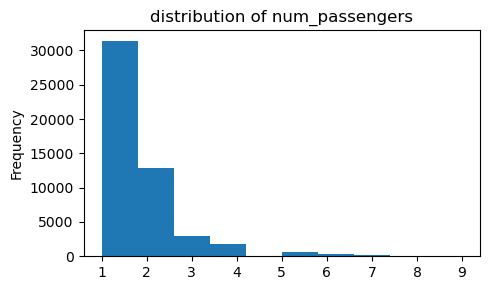

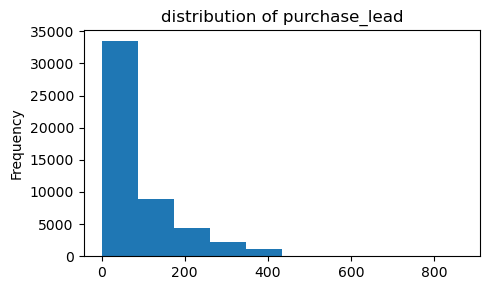

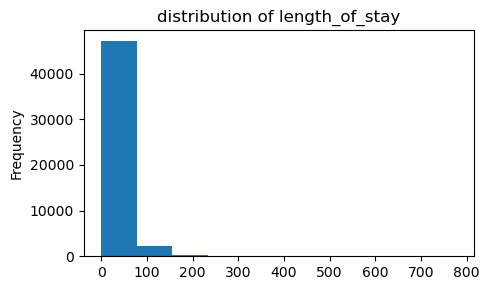

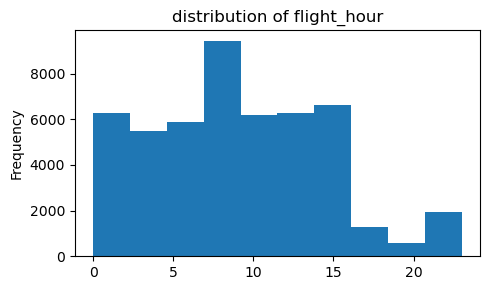

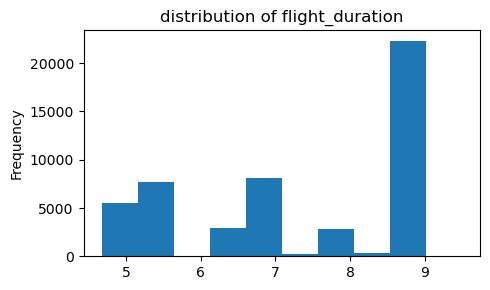

In [101]:
for i in df[num_features]:
    plt.figure(figsize=(5,3))
    df[i].plot(kind='hist')
    plt.title(f"distribution of {i}")
    plt.tight_layout()
    plt.show()
    

# Data preprocessing

The flight_day column has it's values in words, we wan't to convert this into numbers to make it easier to use

In [104]:
print(df["flight_day"].unique())
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

['Sat' 'Wed' 'Thu' 'Mon' 'Sun' 'Tue' 'Fri']


In [105]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

Label encoding of categorical features

In [106]:
mapping = {
    'Internet': 1,
    "Mobile": 0,
}
df['sales_channel'] = df['sales_channel'].map(mapping)

In [107]:
mapping = {
    'RoundTrip': 1,
    'CircleTrip':2,
    'OneWay':3,
}
df['trip_type'] = df['trip_type'].map(mapping)

In [108]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,1,1,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,1,1,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,1,1,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,1,1,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,1,1,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


# Data split

In [115]:
from sklearn.model_selection import train_test_split
x = df.drop(['booking_complete','route','booking_origin'],axis=1)
y = df['booking_complete']

In [116]:
# Flatten y
y = np.ravel(y)

# Initialize the StandardScaler
scale = StandardScaler()

# Transform and scale the features in x_new
x_new = scale.fit_transform(x)


In [117]:
x_train,x_test,y_train,y_test = train_test_split(x_new,y,test_size = 0.3,random_state=8,stratify=y)

In [118]:
x_test.shape

(15000, 11)

# Model selection

This is a classification task so first i try logistic regression something simple

## Model 1. Logistic regression

In [130]:
from sklearn.linear_model import LogisticRegression
l = LogisticRegression(max_iter = 5000)
l.fit(x_train,y_train)
from sklearn import metrics
pre = l.predict(x_test)
print(metrics.classification_report(y_test,pre))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92     12757
           1       0.00      0.00      0.00      2243

    accuracy                           0.85     15000
   macro avg       0.43      0.50      0.46     15000
weighted avg       0.72      0.85      0.78     15000



C:\Users\USER\anaconda3\envs\islp\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\envs\islp\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\envs\islp\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [131]:
metrics.roc_auc_score(y_test, pre)

0.5

we were able to achieve 85% accuracy in the first try with little feature processing

Except looking closer we see our model is simply predicting not completed for all bookings.
Looking at the roc_auc score its only 0.5

## Model 2. Decision tree classifier with grid search for cross validation

In [125]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# Create the Decision Tree classifier
l = DecisionTreeClassifier(random_state=8)

# Define a grid of hyperparameters to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': list(range(1,20))+[None],
    'min_samples_split': list(range(2,10)),
    'min_samples_leaf': [1, 2, 4],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(l, param_grid, cv=3, scoring='f1')

# Fit the grid search to the training data
grid_search.fit(x_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
pre = best_model.predict(x_test)

# Print the classification report
print(metrics.classification_report(y_test, pre))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85     12757
           1       0.22      0.24      0.23      2243

    accuracy                           0.76     15000
   macro avg       0.54      0.54      0.54     15000
weighted avg       0.77      0.76      0.76     15000



In [220]:
print(metrics.roc_auc_score(y_test, best_model.predict(x_test)))

0.5475713053398323


# Feature importance

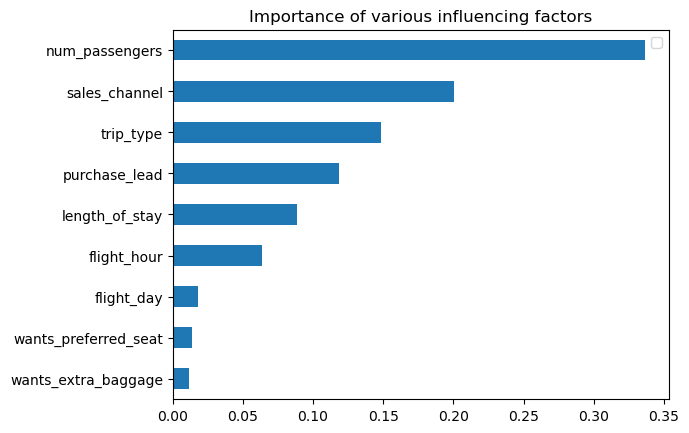

In [222]:
feature_importance_dict = {column: importance for column, importance in zip(x.columns, best_model.feature_importances_)}
feature_importance_df = pd.DataFrame(feature_importance_dict.items(), columns=['Feature', 'Importance'])
feature_importance_df.set_index('Feature', inplace=True)
feature_importance_df.sort_values('Importance',ascending=True).plot(kind='barh')
plt.title("Importance of various influencing factors")
plt.legend('')
plt.xlabel('')
plt.ylabel('')
plt.savefig("Feature_importance.svg")
plt.show()